In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import gym
from main.alpaca import *
from main.dataset import *
from main.dataViz import *
import yaml

2023-12-18 21:23:27.751492: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 21:23:27.752781: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 21:23:27.780217: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 21:23:27.780956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 21:23:28.206293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
cfg_filename = 'configs/sinusoid-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.safe_load(ymlfile)

In [3]:
noise1 = 0.1
noise2 = 0.3
noise3 = 0.5
dataset1 = SinusoidDataset(config, noise_var=noise1, rng=np.random.RandomState(1234))
dataset2 = SinusoidDataset(config, noise_var=noise2, rng=np.random.RandomState(1234))
dataset3 = SinusoidDataset(config, noise_var=noise3, rng=np.random.RandomState(1234))

## Agents

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent1 = ALPaCA(config,sess1,g1)
agent1.sigma_eps = noise1
agent1.construct_model()
agent1.train(dataset1,5000)

Instructions for updating:
non-resource variables are not supported in the long term


Device mapping: no known devices.
Instructions for updating:
Use fn_output_signature instead


2023-12-18 10:19:54.070686: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/siming/anaconda3/envs/alpaca/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:459: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return f(*args, **kwargs)


(?, ?, 32, 1)
(?, ?, 1, 1)


2023-12-18 10:19:54.719683: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-12-18 10:19:54.720470: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:19:54.720481: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:19:54.720484: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:19:54.720487: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform: (AddV2): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:19:54.720489: I tensorflow/core/common_runtime/placer.cc:114] K_init: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:19:54.720492: I tensorfl

K_init/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform: (AddV2): /job:localhost/replica:0/task:0/device:CPU:0
K_init: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform: (AddV2): /job:localhost/replica:0/task:0/device:CPU:0
L_asym: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Assign: (Assign): /job:lo

In [5]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config,sess2,g2)
#agent2.sigma_eps = noise2
agent2.construct_model()
agent2.train(dataset2,5000)

Device mapping: no known devices.


(?, ?, 32, 1)
(?, ?, 1, 1)
eye/diag: (MatrixDiagV3): /job:localhost/replica:0/task:0/device:CPU:0
mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
Reshape: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform: (AddV2): /job:localhost/replica:0/task:0/device:CPU:0
K_init: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
K_init/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/de

2023-12-18 10:20:20.860031: I tensorflow/core/common_runtime/placer.cc:114] eye/diag: (MatrixDiagV3): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:20.860054: I tensorflow/core/common_runtime/placer.cc:114] mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:20.860057: I tensorflow/core/common_runtime/placer.cc:114] Reshape: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:20.860060: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:20.860063: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:20.860065: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:20.860070: I tensorflow/core/common_runti

loss: 165.30424
loss: 8.321475
loss: 12.709787
loss: 12.865052
loss: 16.217455
loss: 19.071186
loss: 13.453731
loss: 17.361769
loss: 8.693668
loss: 7.7396736
loss: 9.551205
loss: 7.710074
loss: 7.535032
loss: 2.3444548
loss: 7.4358025
loss: 4.9052644
loss: 8.883958
loss: 4.433535
loss: 5.190532
loss: 4.650927
loss: 7.159384
loss: 7.363948
loss: 6.3013268
loss: 5.90359
loss: 7.367275
loss: 10.485042
loss: 6.5471106
loss: 4.071821
loss: 3.9053226
loss: 3.3780766
loss: 6.99864
loss: 4.868396
loss: 6.3278575
loss: 7.173656
loss: 3.6148689
loss: 4.5301685
loss: 5.3055115
loss: 5.422235
loss: 5.2835503
loss: 4.886495
loss: 4.9913206
loss: 4.8953023
loss: 5.7824755
loss: 4.4800954
loss: 3.8958056
loss: 3.3808875
loss: 4.385935
loss: 3.4650788
loss: 4.1649904
loss: 3.6500385
loss: 4.2980843
loss: 4.174458
loss: 3.0852015
loss: 6.477752
loss: 6.093961
loss: 3.0962067
loss: 4.5670843
loss: 4.706085
loss: 6.074777
loss: 3.8312266
loss: 3.7229164
loss: 5.435375
loss: 3.3042426
loss: 5.191482
loss:

In [6]:
g3 = tf.Graph()
sess3 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g3)
agent3 = ALPaCA(config,sess3,g3)
#agent3.sigma_eps = noise3
agent3.construct_model()
agent3.train(dataset3,5000)

Device mapping: no known devices.


(?, ?, 32, 1)
(?, ?, 1, 1)


2023-12-18 10:20:42.543789: I tensorflow/core/common_runtime/placer.cc:114] eye/diag: (MatrixDiagV3): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:42.543811: I tensorflow/core/common_runtime/placer.cc:114] mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:42.543814: I tensorflow/core/common_runtime/placer.cc:114] Reshape: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:42.543817: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:42.543820: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:42.543822: I tensorflow/core/common_runtime/placer.cc:114] K_init/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:20:42.543824: I tensorflow/core/common_runti

eye/diag: (MatrixDiagV3): /job:localhost/replica:0/task:0/device:CPU:0
mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
Reshape: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Initializer/random_uniform: (AddV2): /job:localhost/replica:0/task:0/device:CPU:0
K_init: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
K_init/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
K_init/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/Initializ

# Visualize all agents

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False

N_test = 50
test_horz = 30
dataset1 = SinusoidDataset(config, noise_var=noise1, rng=np.random.RandomState(4321))
dataset2 = SinusoidDataset(config, noise_var=noise2, rng=np.random.RandomState(4321))
dataset3 = SinusoidDataset(config, noise_var=noise3, rng=np.random.RandomState(4321))
X_test1, Y_test1, freq_list_test, amp_list_test, phase_list_test = dataset1.sample(N_test, test_horz, return_lists=True)
X_test2, Y_test2 = dataset2.sample(N_test, test_horz, return_lists=False)
X_test3, Y_test3 = dataset3.sample(N_test, test_horz, return_lists=False)

eye/diag: (MatrixDiagV3): /job:localhost/replica:0/task:0/device:CPU:0
mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
Reshape: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
K_init: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
K_init/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
L_asym: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
L_asym/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
transpose: (Transpose): /job:localhost/replica:0/task:0/device:CPU:0
matmul: (MatMul): /job:localhost/replica:0/task:0/device:CPU:0
Shape: (Shape): /job:localhost/replica:0/task:0/device:CPU:0
strided_slice: (StridedSlice): /job:localhost/replica:0/task:0/device:CPU:0
Shape_1: (Shape): /job:localhost/replica:0/task:0/device:CPU:0
strided_slice_1: (StridedSlice): /job:localhost/replica:0/task:0/device:CPU:0
ones/packed: (Pack): /job:localhost/replica:0/task:0/device:CPU:0
ones: (Fill): /job:localhost/replica:0/task:0/device:CPU:

2023-12-18 10:21:05.120162: I tensorflow/core/common_runtime/placer.cc:114] eye/diag: (MatrixDiagV3): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:21:05.120181: I tensorflow/core/common_runtime/placer.cc:114] mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:21:05.120184: I tensorflow/core/common_runtime/placer.cc:114] Reshape: (Reshape): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:21:05.120187: I tensorflow/core/common_runtime/placer.cc:114] K_init: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:21:05.120190: I tensorflow/core/common_runtime/placer.cc:114] K_init/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:21:05.120218: I tensorflow/core/common_runtime/placer.cc:114] L_asym: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
2023-12-18 10:21:05.120220: I tensorflow/core/common_runtime/placer.cc:114] L_asym/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2

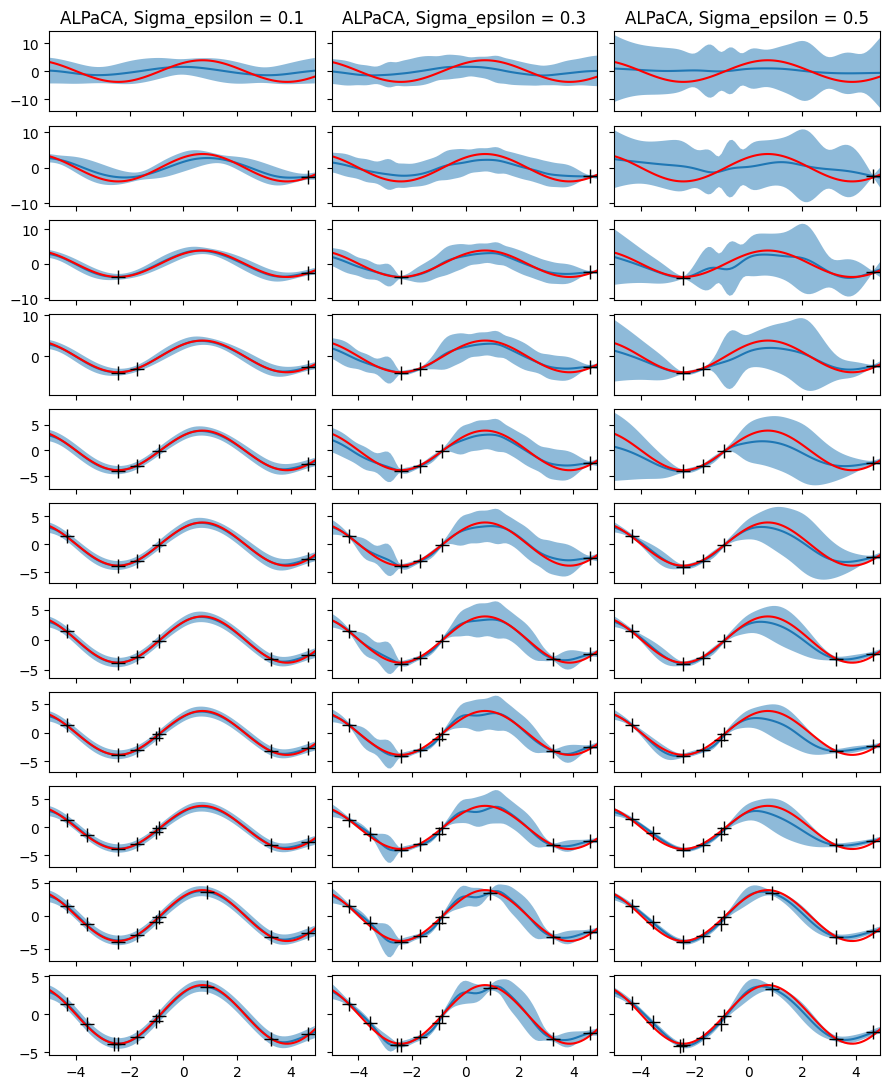

In [8]:
ind = 2
sample_size_list = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(9,len(sample_size_list)*1))
for i,num_pts in enumerate(sample_size_list):
    X_update1 = X_test1[ind:(ind+1),:num_pts,:]
    Y_update1 = Y_test1[ind:(ind+1),:num_pts,:]
    
    X_update2 = X_test2[ind:(ind+1),:num_pts,:]
    Y_update2 = Y_test2[ind:(ind+1),:num_pts,:]
    
    X_update3 = X_test3[ind:(ind+1),:num_pts,:]
    Y_update3 = Y_test3[ind:(ind+1),:num_pts,:]
    
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True
        
    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_sin_fig(agent1, X_update1, Y_update1, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    if i == 0:
        plt.title('ALPaCA, Sigma_epsilon = 0.1')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_sin_fig(agent2, X_update2, Y_update2, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title('ALPaCA, Sigma_epsilon = 0.3')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
    
    ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
    gen_sin_fig(agent3, X_update3, Y_update3, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    plt.setp(ax3.get_yticklabels(), visible=False)
    if i == 0:
        plt.title('ALPaCA, Sigma_epsilon = 0.5')
    if i < len(sample_size_list) - 1:
        plt.setp(ax3.get_xticklabels(), visible=False)

plt.tight_layout(w_pad=0.0,h_pad=0.2)
plt.savefig('figures/sinusoid_varying_noise.pdf')
plt.show()